In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

#from tensorflow import keras
from keras.utils import to_categorical
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.preprocessing import image
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

#### Splitting data into features and labels for test and training data

In [4]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = pd.read_csv('test.csv')
print(test.shape)

(28000, 784)


In [6]:
X_train = train.iloc[:,1:].values.astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
X_test = test.values.astype('float32')

In [6]:
X_train.shape

(42000, 784)

#### Plotting the data

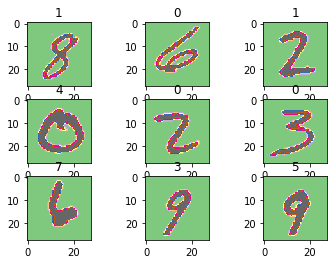

In [8]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i+20],cmap=plt.get_cmap('Accent'))
    plt.title(y_train[i]);

#### Reshape the data to add a color 

In [9]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#### Standartize the data

In [10]:
mean_px = np.mean(X_train).astype('float32')
std_px = np.std(X_train).astype('float32')

def standartize(x):
    return (x - mean_px)/std_px

##### One-hot encoding of labels

In [11]:
y_train = to_categorical(y_train)

(42000, 10)

/root/anaconda3/envs/rpz/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


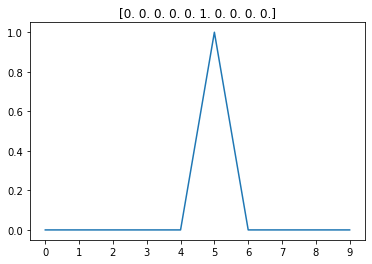

In [13]:
plt.plot(y_train[19])
plt.xticks(range(0,10))
plt.title(y_train[19])
plt.show()

### Creating the Linear Neural Network

In [14]:
np.random.seed(12)

In [24]:
model = Sequential()
model.add(Lambda(standartize,input_shape = (28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

In [25]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28, 1)
(None, 10)


##### Optimizing

In [26]:
model.compile(optimizer = RMSprop(lr = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [27]:
gen = image.ImageDataGenerator()

#### Cross-validation

In [19]:
y_train.shape

(42000, 10)

In [28]:
X = X_train
y = y_train
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.10, random_state=12)
batches = gen.flow(X_train,y_train,batch_size=64)
val_batches = gen.flow(X_val,y_val,batch_size=64)

## Still didn't use Standartize function and apply Neural Network to our model 

In [33]:
history = model.fit_generator(generator = batches, steps_per_epoch=len(X_train)//len(batches),\
                              epochs=3,validation_data=val_batches,validation_steps=len(X_val)//len(val_batches))

Epoch 1/3
63/63 [==============================] - 0s 7ms/step - loss: 0.3059 - accuracy: 0.9117 - val_loss: 0.3028 - val_accuracy: 0.9067
Epoch 2/3
63/63 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.9172 - val_loss: 0.2996 - val_accuracy: 0.9112
Epoch 3/3
63/63 [==============================] - 0s 7ms/step - loss: 0.3225 - accuracy: 0.9065 - val_loss: 0.3075 - val_accuracy: 0.9087


In [35]:
history = history.history

AttributeError: 'dict' object has no attribute 'history'

In [44]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

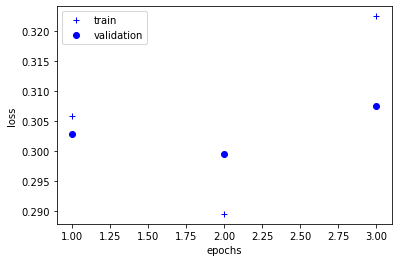

In [56]:
#history['loss']
epochs = range(1,1+len(history['loss']))
plt.plot(epochs,history['loss'],'b+')
plt.plot(epochs,history['val_loss'],'bo')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

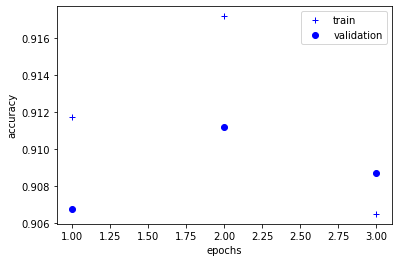

In [57]:
epochs = range(1,1+len(history['accuracy']))
plt.plot(epochs,history['accuracy'],'b+')
plt.plot(epochs,history['val_accuracy'],'bo')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.show()

### Fully Connected Layer

In [73]:
def get_model():
    model = Sequential([
        layers.Lambda(standartize,input_shape = (28,28,1)),
        layers.Flatten(),
        layers.Dense(512,activation = 'relu'),
        layers.Dense(10,activation = 'softmax'),
    ])
    model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model

In [75]:
fc = get_model()
fc.optimizer.lr = 0.01

In [76]:
full_history = model.fit_generator(generator = batches, steps_per_epoch=len(X_train)//len(batches),\
                              epochs=3,validation_data=val_batches,validation_steps=len(X_val)//len(val_batches))

Epoch 1/3
18/63 [=======>......................] - ETA: 0s - loss: 0.3133 - accuracy: 0.9193

/root/anaconda3/envs/rpz/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


63/63 [==============================] - 1s 8ms/step - loss: 0.3154 - accuracy: 0.9107 - val_loss: 0.3064 - val_accuracy: 0.9110
Epoch 2/3
63/63 [==============================] - 0s 6ms/step - loss: 0.2910 - accuracy: 0.9144 - val_loss: 0.2925 - val_accuracy: 0.9144
Epoch 3/3
63/63 [==============================] - 1s 9ms/step - loss: 0.3195 - accuracy: 0.9095 - val_loss: 0.2924 - val_accuracy: 0.9127


In [78]:
full_history = full_history.history

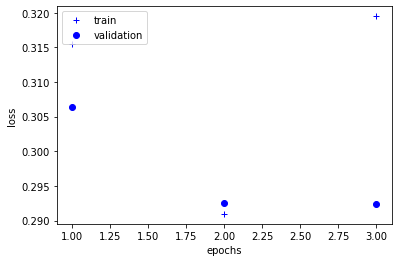

In [79]:
epochs = range(1,1+len(full_history['loss']))
plt.plot(epochs,full_history['loss'],'b+')
plt.plot(epochs,full_history['val_loss'],'bo')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

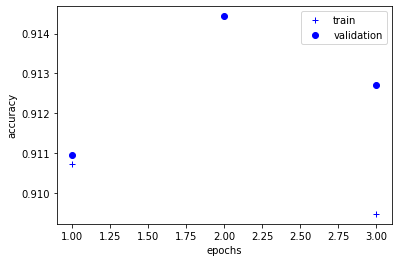

In [80]:
epochs = range(1,1+len(full_history['accuracy']))
plt.plot(epochs,full_history['accuracy'],'b+')
plt.plot(epochs,full_history['val_accuracy'],'bo')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.show()